# Surrogate Model Summary

The notebook allows you to inspect the surragte models and process model data.  If the there are changes to the process model data, the surrgates can be rebuilt by just deleting the `../save_sorrogate_models` directory and running this notebook or any other script that uses the models.

In [1]:
from util.surrogate import SurrogateProcessModels
from util.data import get_model_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

## Generate or Load Surrgate Models

In [2]:
surrogate = SurrogateProcessModels()
surrogate.generate_surrogate_models()
model_data = get_model_data()

res1 r^2 = 0.9996438292174483
res2 r^2 = 0.9984455642574213
res3 r^2 = 0.9922209901945035
res1 r^2 = 0.9999061259783951
res2 r^2 = 0.9977614710257781


## Bounds

This section shows the bounds and inequality constraints for each model.  The bounds are provided in `../data/model_data.json` if they need to be changed.  The inequality constraints for cases 3 and 5 are
generated from the model data.

### Case 0 Bounds

In [3]:
model = "model0"
print(f'{model}: {model_data[model]["description"]}')
print(f'Power only UB {model_data[model]["power_ub"]}')
print(f'Power only LB {model_data[model]["power_lb"]}')

model0: NGCC
Power only UB 650
Power only LB 160


### Case 1 Bounds

In [4]:
model = "model1"
print(f'{model}: {model_data[model]["description"]}')
print(f'Power only UB {model_data[model]["power_ub"]}')
print(f'Power only LB {model_data[model]["power_lb"]}')

model1: SOFC
Power only UB 650
Power only LB 200


### Case 3 Bounds

In [5]:
model = "model3"
print(f'{model}: {model_data[model]["description"]}')
print(f'Power only UB {model_data[model]["power_ub"]}')
print(f'Power only LB {model_data[model]["power_lb"]}')
print(f'Power with H2 UB {model_data[model]["power_with_h2_ub"]}')
print(f'Power with H2 LB {model_data[model]["power_with_h2_lb"]}')
print(f'H2 with power UB {model_data[model]["hydrogen_ub"]}')
print(f'H2 with power LB {model_data[model]["hydrogen_lb"]}')

model3: NGCC+SOEC
Power only UB 650
Power only LB 160
Power with H2 UB 508.8
Power with H2 LB -74.2
H2 with power UB 5.0
H2 with power LB 1.0


Net power (MW) bounds as a function of hydrogen (kg/s).

In [6]:
model = "model3"
for ineq in surrogate.models[model]["hydrogen"]["linear_hprod_ineq"]:
    print(f'Net Power {ineq["op"]} {ineq["slope"]} * h_prod + {ineq["intercept"]}')

Net Power <= -141.1564656552606 * h_prod + 650.716262202272
Net Power >= -146.0192091014791 * h_prod + 475.62311832002956
Net Power >= 16.40308101281679 * h_prod + -139.14189946934033


res1 r^2 = 0.9996438292174483
res2 r^2 = 0.9984455642574213
res3 r^2 = 0.9922209901945035


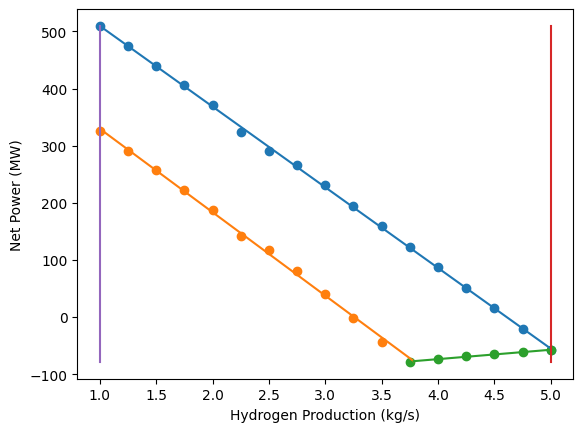

In [7]:
surrogate.model3_ineq_bounds(show_plot=True)

### Case 4 Bounds

In [8]:
model = "model4"
print(f'{model}: {model_data[model]["description"]}')
print(f'Power only UB {model_data[model]["power_ub"]}')
print(f'Power only LB {model_data[model]["power_lb"]}')
print(f'H2 only UB {model_data[model]["hydrogen_ub"]}')
print(f'H2 only LB {model_data[model]["hydrogen_lb"]}')

model4: rSOC
Power only UB 650
Power only LB 200
H2 only UB 5.0
H2 only LB 1.0


### Case 5 Bounds

In [9]:
model = "model5"
print(f'{model}: {model_data[model]["description"]}')
print(f'Power only UB {model_data[model]["power_ub"]}')
print(f'Power only LB {model_data[model]["power_lb"]}')
print(f'Power with H2 UB {model_data[model]["power_with_h2_ub"]}')
print(f'Power with H2 LB {model_data[model]["power_with_h2_lb"]}')
print(f'H2 with power UB {model_data[model]["hydrogen_ub"]}')
print(f'H2 with power LB {model_data[model]["hydrogen_lb"]}')

model5: SOFC+SOEC
Power only UB 712
Power only LB 220
Power with H2 UB 567
Power with H2 LB -392.0
H2 with power UB 5.0
H2 with power LB 1.0


Net power (MW) bounds as a function of hydrogen (kg/s).

In [10]:
model = "model5"
for ineq in surrogate.models[model]["hydrogen"]["linear_hprod_ineq"]:
    print(f'Net Power {ineq["op"]} {ineq["slope"]} * h_prod + {ineq["intercept"]}')

Net Power <= -142.062173 * h_prod + 711.8043778888889
Net Power >= -120.46142333333333 * h_prod + 220.30708555555557


res1 r^2 = 0.9999061259783951
res2 r^2 = 0.9977614710257781


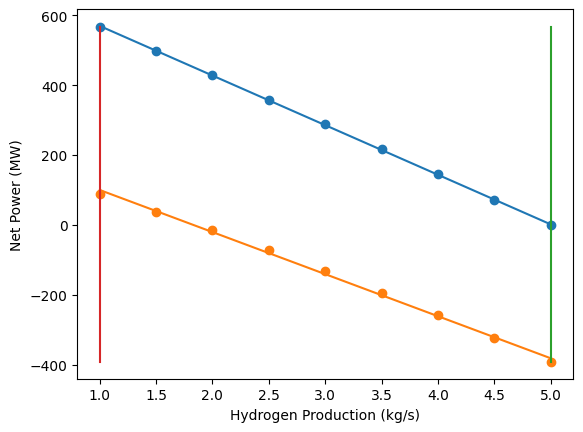

In [11]:
surrogate.model5_ineq_bounds(show_plot=True)

### Case 6 Bounds

In [12]:
model = "model6"
print(f'{model}: {model_data[model]["description"]}')
print(f'H2 only UB {model_data[model]["hydrogen_ub"]}')
print(f'H2 only LB {model_data[model]["hydrogen_lb"]}')

model6: SOEC
H2 only UB 5.0
H2 only LB 1.0


## Surrogate Models

In [13]:
for model, mode in [
    ("model0", "power_only"),
    ("model1", "power_only"),
    ("model3", "power_only"),
    ("model3", "hydrogen"),
    ("model4", "power_only"),
    ("model4", "hydrogen_only"),
    ("model5", "power_only"),
    ("model5", "hydrogen"),
    ("model6", "hydrogen_only"),
]:
    print("\n\n")
    print("###########################################################################")
    print(f"Surrogate for {model} {mode}")
    print("###########################################################################")
    surrogate.display_metrics(model, mode)




###########################################################################
Surrogate for model0 power_only
###########################################################################

total_var_cost
    RMSE 1.7431492900849075
    MSE 3.038569447523517
    MAE 1.568267863525307
    maxAE 3.287747736194433
    SSE 60.771388950470346
    R2 0.9999998552012868
    total_var_cost == 35.675386758997817082673 * net_power - 0.76927528592829500994621E-002 * net_power**2 + 0.52184801272929079150897E-005 * net_power**3 + 2889.6521611361645227589

fuel_var_cost
    RMSE 1.4797532173792958
    MSE 2.1896695843443776
    MAE 1.3312969978907858
    maxAE 2.790957331219033
    SSE 43.79339168688755
    R2 0.9999998552012868
    fuel_var_cost == 30.284708623937245164370 * net_power - 0.65303504747740393973632E-002 * net_power**2 + 0.44299491742730474308997E-005 * net_power**3 + 2453.0154169237257519853

other_var_cost
    RMSE 0.2633960726953583
    MSE 0.06937749111133848
    MAE 0.23697086562549

## Error Analysis

### 2D Error Contour Function

In [14]:
def plot_1d_error(x, perr, xlabel="Net Power (MW)"):
    fig, ax = plt.subplots()
    ax.plot(x, perr)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Total Variable Cost Error (%)")
    return fig

In [15]:
def plot_2d_error(h_prod, net_power, perr):
    fig, ax = plt.subplots()
    ngridx = 50
    ngridy = 40
    xi = np.linspace(1, 5, ngridx)
    yi = np.linspace(min(net_power), max(net_power), ngridy)
    triang = tri.Triangulation(h_prod, net_power)
    interpolator = tri.LinearTriInterpolator(triang, perr)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    cscale = ax.contourf(xi, yi, zi, cmap="RdBu_r")
    fig.colorbar(cscale, ax=ax, label="Total Variable Cost Error (%)")
    ax.set_xlabel("Hydrogen Production (kg/s)")
    ax.set_ylabel("Net Power (MW)")
    return fig

### Model 0 Error Plots

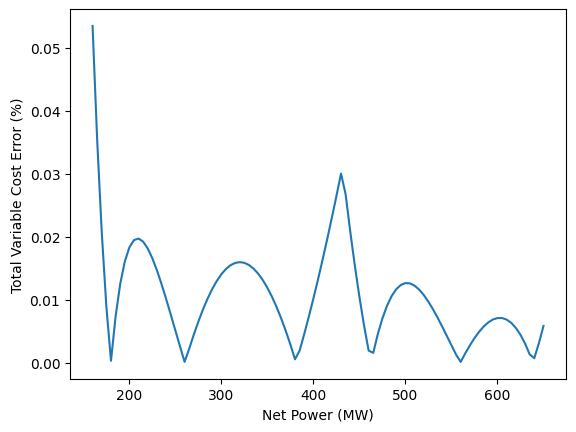

In [16]:
model = "model0"

net_power = np.array(surrogate.models[model]["power_only"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["power_only"]["data"]["total_var_cost"])

x = pd.DataFrame(net_power.transpose(), columns=("net_power",))
df = surrogate.models[model]["power_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_power.png", dpi=320, bbox_inches="tight")

### Model 1 Error Plots

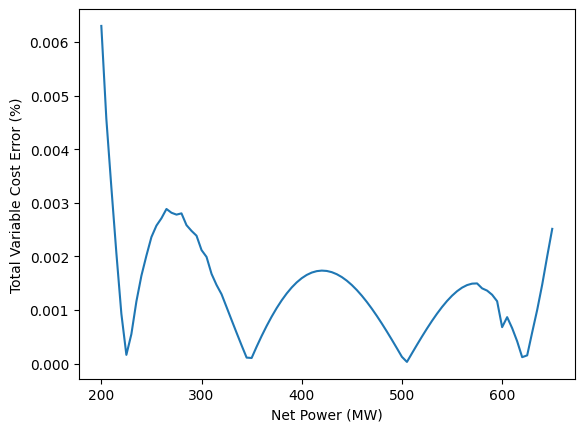

In [17]:
model = "model1"

net_power = np.array(surrogate.models[model]["power_only"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["power_only"]["data"]["total_var_cost"])

x = pd.DataFrame(net_power.transpose(), columns=("net_power",))
df = surrogate.models[model]["power_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_power.png", dpi=320, bbox_inches="tight")

### Model 3 Error Plots

#### PowerOnly

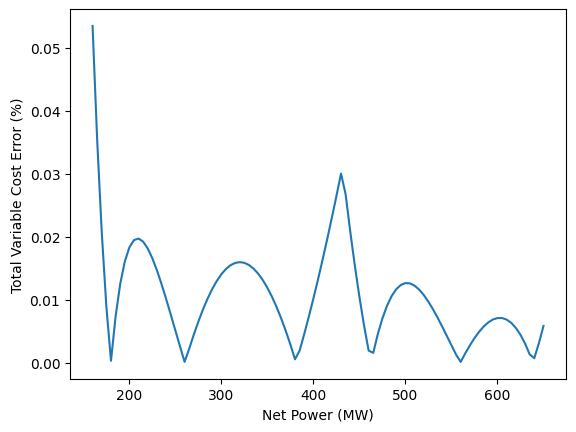

In [18]:
model = "model3"

net_power = np.array(surrogate.models[model]["power_only"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["power_only"]["data"]["total_var_cost"])

x = pd.DataFrame(net_power.transpose(), columns=("net_power",))
df = surrogate.models[model]["power_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_power.png", dpi=320, bbox_inches="tight")

#### Hydrogen + Powewr

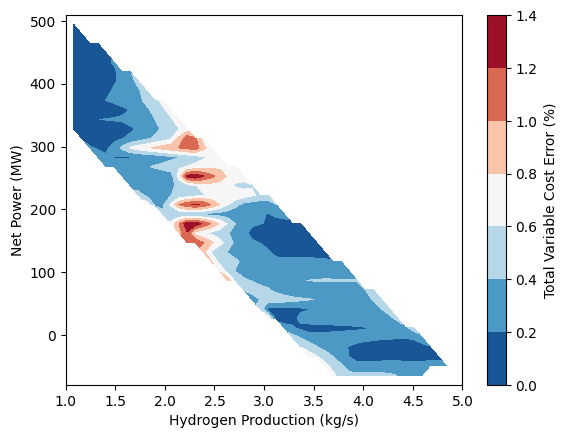

In [19]:
model = "model3"

h_prod = np.array(surrogate.models[model]["hydrogen"]["data"]["h_prod"])
net_power = np.array(surrogate.models[model]["hydrogen"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["hydrogen"]["data"]["total_var_cost"])
x = pd.DataFrame(np.vstack((net_power, h_prod)).transpose(), columns=("net_power", "h_prod"))
df = surrogate.models[model]["hydrogen"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100
fig = plot_2d_error(h_prod, net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_hydrogen.png", dpi=320, bbox_inches="tight")

### Model 4 Error Plots

#### Power

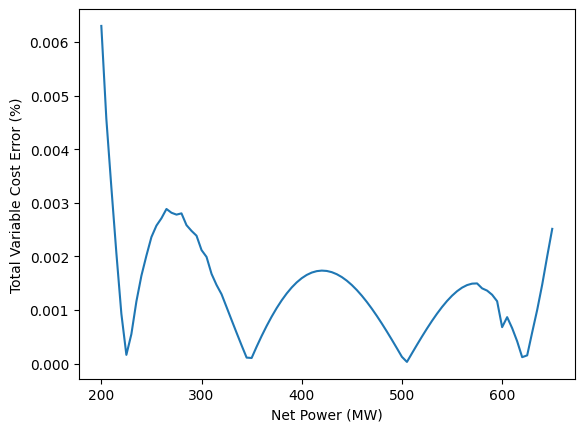

In [20]:
model = "model4"

net_power = np.array(surrogate.models[model]["power_only"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["power_only"]["data"]["total_var_cost"])

x = pd.DataFrame(net_power.transpose(), columns=("net_power",))
df = surrogate.models[model]["power_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_power.png", dpi=320, bbox_inches="tight")

#### Hydrogen

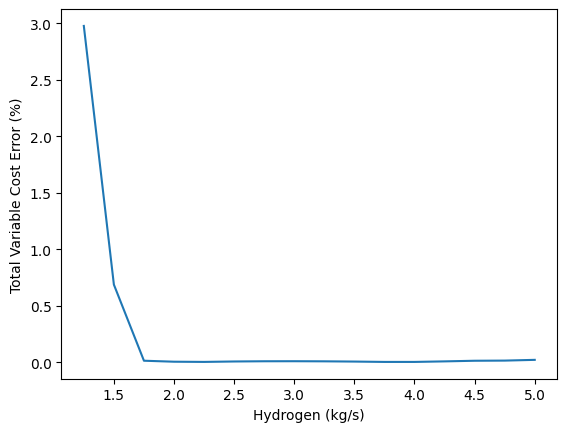

In [21]:
model = "model4"

h_prod = np.array(surrogate.models[model]["hydrogen_only"]["data"]["h_prod"])
total_var_cost = np.array(surrogate.models[model]["hydrogen_only"]["data"]["total_var_cost"])

x = pd.DataFrame(h_prod.transpose(), columns=("h_prod",))
df = surrogate.models[model]["hydrogen_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(h_prod, perr, "Hydrogen (kg/s)")
plt.savefig(f"../saved_surrogate_models/error_{model}_hydrogen.png", dpi=320, bbox_inches="tight")

### Model 5 Error Plots

#### Power

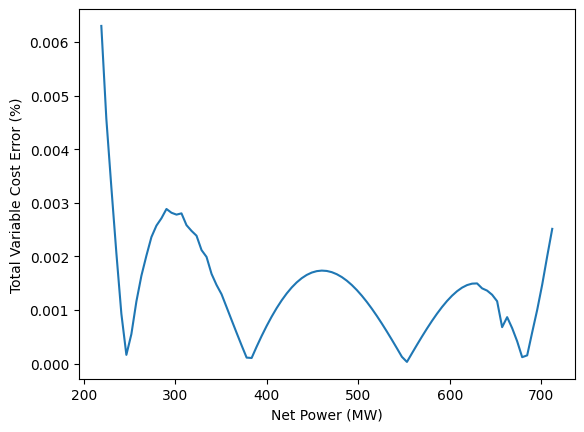

In [22]:
model = "model5"

net_power = np.array(surrogate.models[model]["power_only"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["power_only"]["data"]["total_var_cost"])

x = pd.DataFrame(net_power.transpose(), columns=("net_power",))
df = surrogate.models[model]["power_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_power.png", dpi=320, bbox_inches="tight")

#### Hydrogen + Power

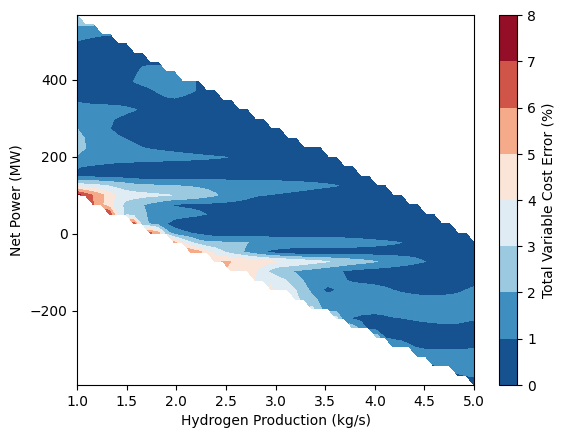

In [23]:
model = "model5"

h_prod = np.array(surrogate.models[model]["hydrogen"]["data"]["h_prod"])
net_power = np.array(surrogate.models[model]["hydrogen"]["data"]["net_power"])
total_var_cost = np.array(surrogate.models[model]["hydrogen"]["data"]["total_var_cost"])
x = pd.DataFrame(np.vstack((net_power, h_prod)).transpose(), columns=("net_power", "h_prod"))
df = surrogate.models[model]["hydrogen"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100
fig = plot_2d_error(h_prod, net_power, perr)
plt.savefig(f"../saved_surrogate_models/error_{model}_hydrogen.png", dpi=320, bbox_inches="tight")

### Model 6

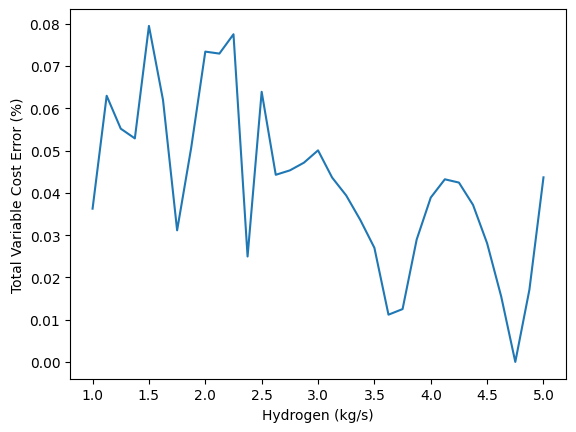

In [24]:
model = "model6"

h_prod = np.array(surrogate.models[model]["hydrogen_only"]["data"]["h_prod"])
total_var_cost = np.array(surrogate.models[model]["hydrogen_only"]["data"]["total_var_cost"])

x = pd.DataFrame(h_prod.transpose(), columns=("h_prod",))
df = surrogate.models[model]["hydrogen_only"]["model"].evaluate_surrogate(x)
aerr = np.array(df["total_var_cost"]) - total_var_cost
perr = np.abs(aerr/total_var_cost)*100

fig = plot_1d_error(h_prod, perr, "Hydrogen (kg/s)")
plt.savefig(f"../saved_surrogate_models/error_{model}_hydrogen.png", dpi=320, bbox_inches="tight")